# Clasificación de Pitches de Startups

![Banner](banner.png)

## Importar dependencias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

## Para trabajar en colab


In [ ]:
#import os
#from google.colab import drive
#drive.mount('/content/drive')
#path='/content/drive/MyDrive/Clasificaci-n-de-Pitches-de-Startups/'
#os.chdir(path)

# Actualizar el archivo en colab
#%cd /content/drive/MyDrive/Clasificación de Pitches de Startups/
#!git pull

## Aplicar Shape,Columns,head()

In [4]:
a=pd.read_csv('startup_company_one_line_pitches.csv')
print('Dimensiones: ',a.shape)
print('Columnas: ',a.columns)
a.head(10)

Dimensiones:  (3069, 15)
Columnas:  Index(['Startup_ID', 'Company_Name', 'Industry', 'One_Line_Pitch',
       'Founding_Year', 'Headquarters_Location', 'Funding_Stage',
       'Last_Funding_Amount_USD_Millions', 'Number_of_Employees', 'Website',
       'LinkedIn_Profile', 'Twitter_Handle', 'CEO_Name', 'Core_Technology',
       'Market_Size_Billion_USD'],
      dtype='object')


,Startup_ID,Company_Name,Industry,One_Line_Pitch,Founding_Year,Headquarters_Location,Funding_Stage,Last_Funding_Amount_USD_Millions,Number_of_Employees,Website,LinkedIn_Profile,Twitter_Handle,CEO_Name,Core_Technology,Market_Size_Billion_USD
0,1,"Rodriguez, Figueroa and Sanchez",Social Media,Social currencies incentivizing participation ...,2016,"Lake Curtis, Saint Vincent and the Grenadines",Pre-Seed,0.25,NaN,rodriguezfigueroaandsanchez.app,https://linkedin.com/company/rodriguez-figuero...,@rodriguezfig8936,Angie Henderson,Machine Learning,15.0
1,2,Davis and Sons,EdTech,Predictive dropout prevention powered by analy...,2014,"New Jamesside, Italy",Pre-Seed,1.07,8.0,davisandsons.tech,https://linkedin.com/company/davis-and-sons,@davisandsons4558,Kevin Pacheco,Big Data,5.0
2,3,Blake and Sons,SaaS,Cross-border collaboration SaaS optimized for ...,2018,"Petersonberg, Cuba",Series B,NaN,121.0,blakeandsons.ai,https://linkedin.com/company/blake-and-sons,@blakeandsons9892,Gabrielle Davis,Deep Learning,60.0
3,4,Howard LLC,IoT,AI + IoT integration enabling self-healing mac...,2017,"Lindsaymouth, Mauritania",Seed,3.19,20.0,howardllc.io,https://linkedin.com/company/howard-llc,@howardllc1140,Thomas Miller,IoT,10.0
4,5,Calderon-Montgomery,Mobility,Voice-first interfaces for vehicle infotainmen...,2016,"Barbaraland, Aruba",Seed,4.21,13.0,calderonmontgomery.io,https://linkedin.com/company/calderon-montgomery,@calderonmont4375,Patricia Galloway,NLP,15.0
5,6,Delacruz Group,HealthTech,Federated learning safeguarding patient privacy.,2025,"Shawnstad, Central African Republic",Private Equity,195.93,314.0,delacruzgroup.io,https://linkedin.com/company/delacruz-group,@delacruzgrou526,Daniel Adams,Cloud Computing,80.0
6,7,"Wong, Lynch and Jackson",Gaming,Augmented reality overlays in multiplayer sett...,2023,"East Steven, Faroe Islands",Series D,278.64,471.0,wonglynchandjackson.io,https://linkedin.com/company/wong-lynch-and-ja...,@wonglynchand4041,Margaret Hawkins DDS,Quantum Computing,60.0
7,8,Perez Inc,E-commerce,Visual search technology turning images into b...,2023,"Richardland, Croatia",Series A,NaN,NaN,perezinc.com,https://linkedin.com/company/perez-inc,@perezinc2505,Latoya Robbins,NLP,30.0
8,9,Rios Group,Cybersecurity,Micro-segmentation restricting breach spread.,2016,"Thomasberg, Egypt",IPO,874.70,NaN,riosgroup.app,https://linkedin.com/company/rios-group,@riosgroup1877,Kimberly Burgess,5G,60.0
9,10,Hurst-Ross,HealthTech,Respiratory monitoring powered by predictive ML.,2016,"East William, Bermuda",Pre-Seed,1.15,2.0,hurstross.app,https://linkedin.com/company/hurst-ross,@hurstross4890,Shannon Hernandez,Cloud Computing,40.0


## Aplicar describe

In [5]:
a.describe()

,Startup_ID,Founding_Year,Last_Funding_Amount_USD_Millions,Number_of_Employees,Market_Size_Billion_USD
count,3069.000000,3069.000000,2174.000000,2608.000000,2855.00000
mean,1535.000000,2016.578364,142.266136,575.139187,58.28021
std,886.088314,5.211136,207.375894,940.514767,41.54179
min,1.000000,2008.000000,0.050000,1.000000,5.00000
25%,768.000000,2012.000000,4.445000,29.000000,20.00000
50%,1535.000000,2017.000000,52.940000,190.000000,50.00000
75%,2302.000000,2021.000000,189.900000,659.250000,90.00000
max,3069.000000,2025.000000,998.460000,4977.000000,150.00000


## Limpieza del dataset

In [6]:
columnas_eliminar = ['Startup_ID', 'Website', 'LinkedIn_Profile', 'Twitter_Handle', 'CEO_Name']
a = a.drop(columns=columnas_eliminar)

#Eliminar o Arreglar columnas con NaN
num_cols = a.select_dtypes(include=['float64', 'int64']).columns
obj_cols = a.select_dtypes(include=['object']).columns


for col in num_cols:
    media = a[col].mean()
    a[col] = a[col].fillna(media)

a = a.dropna(subset=obj_cols)

print(f"Forma del DataFrame después de la limpieza: {a.shape}")
print(f"NaN restantes: {a.isnull().sum().sum()}")

Forma del DataFrame después de la limpieza: (2733, 10)
NaN restantes: 0


## Graficar Columnas

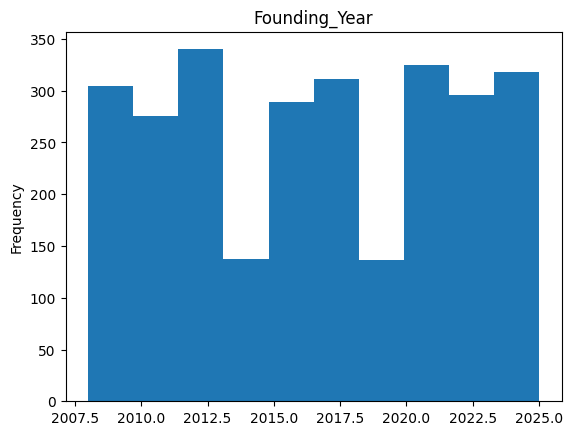

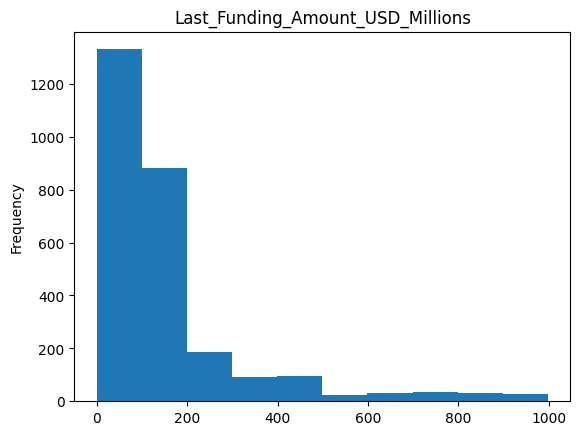

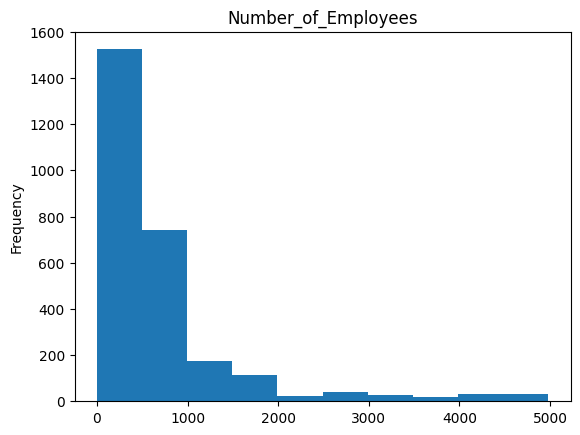

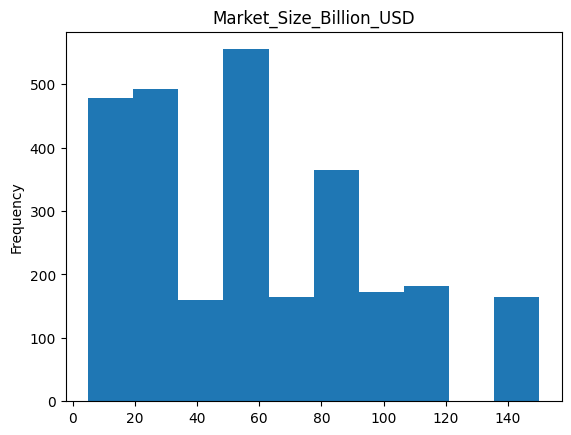

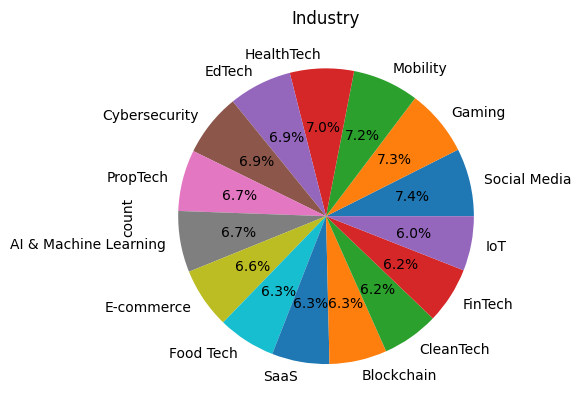

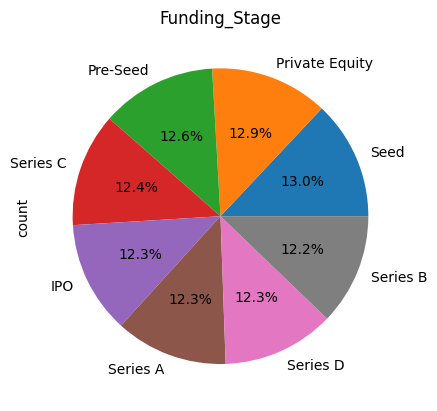

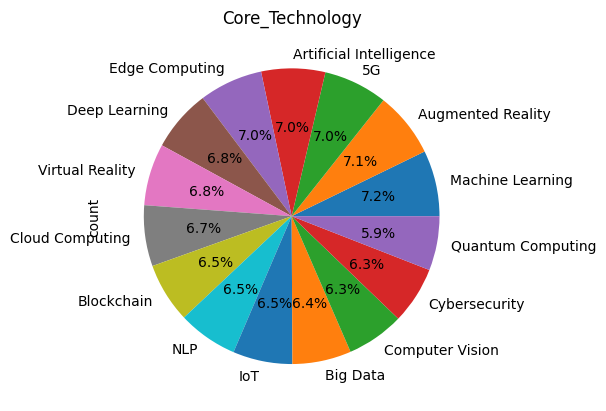

Text(0.5, 1.0, 'Top 15 ubicaciones de startups')

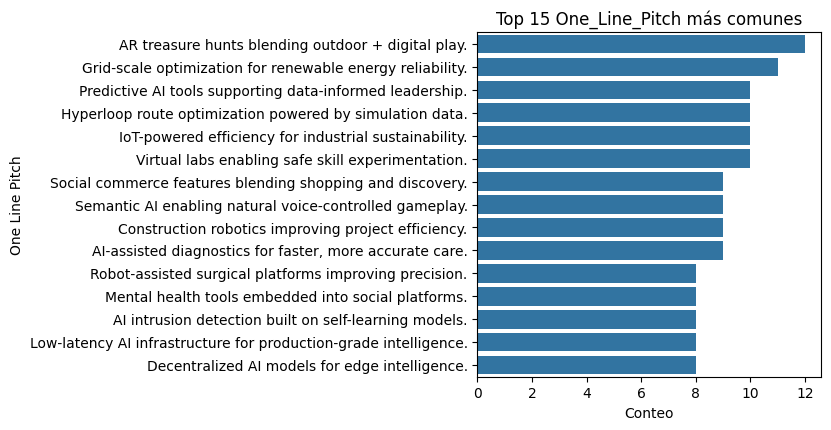

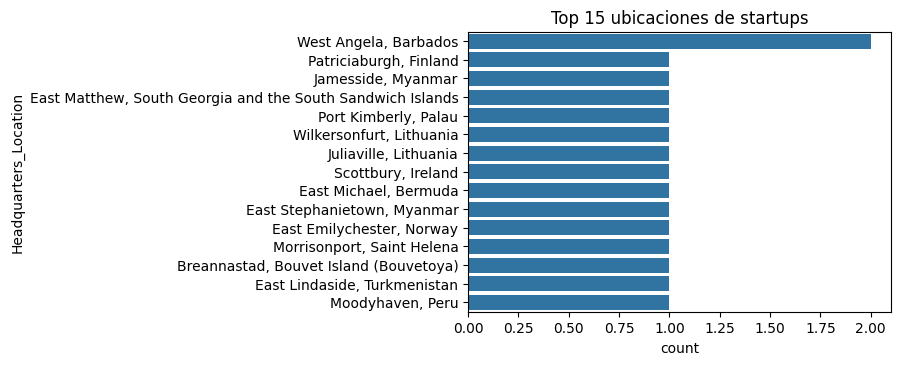

In [7]:
for col in num_cols:
    a[col].plot(kind='hist', title=col)
    plt.show()

columnas_excluir = ['One_Line_Pitch', 'Headquarters_Location','Company_Name']
obj_cols_filtradas = [col for col in obj_cols if col not in columnas_excluir]
for col in obj_cols_filtradas:
    a[col].value_counts().plot(kind='pie', title=col, autopct='%1.1f%%')
    plt.show()


top_pitches = a['One_Line_Pitch'].value_counts().head(15)

plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
sns.countplot(data=a[a['One_Line_Pitch'].isin(top_pitches.index)],y='One_Line_Pitch', order=top_pitches.index)
plt.title('Top 15 One_Line_Pitch más comunes')
plt.xlabel('Conteo')
plt.ylabel('One Line Pitch')
plt.tight_layout()

plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
top_locations = a['Headquarters_Location'].value_counts().head(15)
sns.countplot(data=a[a['Headquarters_Location'].isin(top_locations.index)],y='Headquarters_Location', order=top_locations.index)
plt.title('Top 15 ubicaciones de startups')


Va a hacer clasificación


# Segunda entrega del proyecto

## Particionado del dataset


In [8]:
from sklearn.model_selection import train_test_split


X = a['One_Line_Pitch']
y = a['Industry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Vectorizacion de la entrada

In [9]:
# Se tiene que vectorizar la entrada de texto ya que los modelos de ML no trabajan con texto directamente
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

###Vectorizacion de la sailda


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## Segundo punto

### Decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

est = DecisionTreeClassifier()
est.fit(X_train_vec, y_train)
print('accuracy:',accuracy_score(est.predict(X_test_vec), y_test))

accuracy: 0.9616087751371115


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier()
est.fit(X_train_vec, y_train)
print('accuracy:',accuracy_score(est.predict(X_test_vec), y_test))

accuracy: 0.9780621572212066


### SVC

In [13]:
from sklearn.svm import SVC

est = SVC()
est.fit(X_train_vec, y_train)
print('accuracy:',accuracy_score(est.predict(X_test_vec), y_test))

accuracy: 0.9744058500914077


## Tercer Punto

### Decision tree

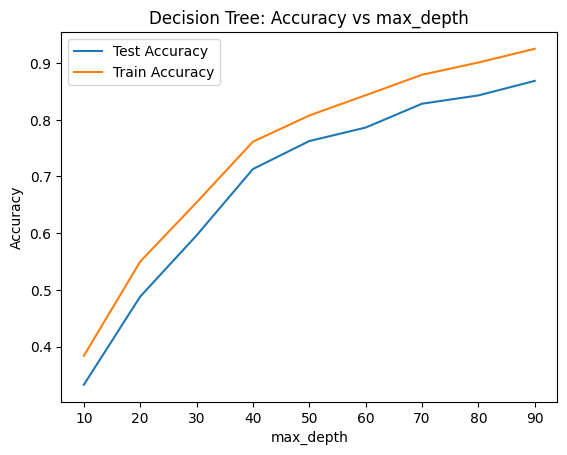

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

max_depths = range(10, 100, 10)
accuracies_test = []
accuracies_train = []

for d in max_depths:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train_vec, y_train)
    accuracy_test = accuracy_score(y_test, model.predict(X_test_vec))
    accuracy_train = accuracy_score(y_train, model.predict(X_train_vec))
    accuracies_test.append(accuracy_test)
    accuracies_train.append(accuracy_train)

plt.plot(max_depths, accuracies_test, label='Test Accuracy')
plt.plot(max_depths, accuracies_train, label='Train Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Decision Tree: Accuracy vs max_depth')
plt.show()



Al aumentar la profundidad máxima del árbol, tanto la precisión en entrenamiento como en prueba suben progresivamente. Sin embargo, la precisión en entrenamiento siempre es mayor, y a profundidades altas (más ramas) el modelo se acerca peligrosamente al sobreajuste, con accuracy casi perfecta en train pero menor en test.

Este comportamiento es típico de los árboles de decisión: dejar crecer mucho la profundidad los vuelve excelentes para aprender patrones detallados en entrenamiento, pero pierden capacidad de generalización.


### Random Forest

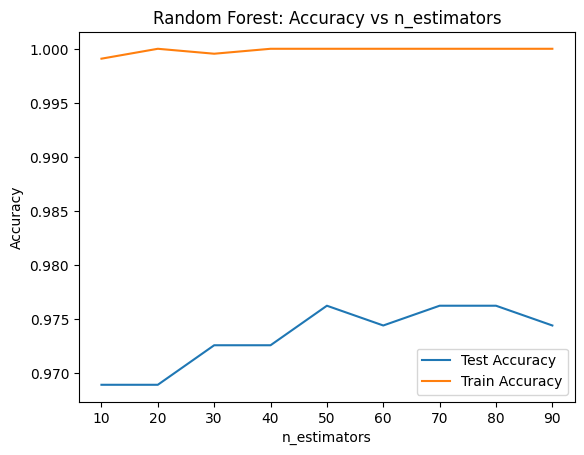

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

n_estimators = range(10, 100, 10)
accuracies_test = []
accuracies_train = []


for d in n_estimators:
    model = RandomForestClassifier(n_estimators=d)
    model.fit(X_train_vec, y_train)
    accuracy_test = accuracy_score(y_test, model.predict(X_test_vec))
    accuracy_train = accuracy_score(y_train, model.predict(X_train_vec))
    accuracies_test.append(accuracy_test)
    accuracies_train.append(accuracy_train)

plt.plot(n_estimators, accuracies_test, label='Test Accuracy')
plt.plot(n_estimators, accuracies_train, label='Train Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Random Forest: Accuracy vs n_estimators')
plt.show()


Al variar la cantidad de estimadores (árboles), la precisión en entrenamiento se mantiene muy alta y estable, cerca de 1, lo que demuestra que el ensamble logra captar muy bien los patrones internos del set.

La precisión en prueba es también elevada, aunque muestra pequeñas fluctuaciones según el número de árboles. Si el test accuracy baja al aumentar el número de árboles y el train accuracy permanece muy alto, el modelo podría empezar a sobreajustar en casos extremos, pero por lo general el Random Forest es menos susceptible que un solo árbol.


### SVC

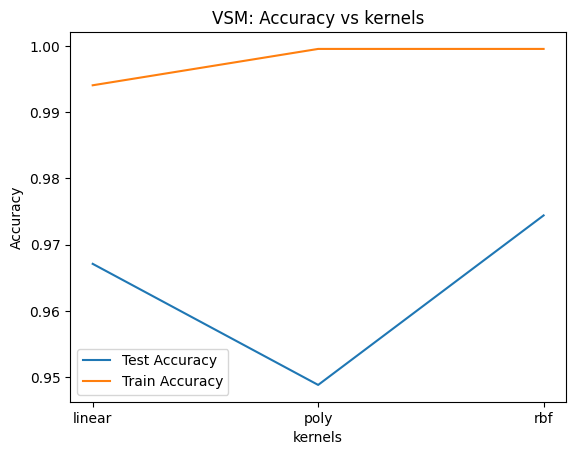

In [16]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf']
accuracies_test = []
accuracies_train = []


for d in kernels:
    model = SVC(kernel=d)
    model.fit(X_train_vec, y_train)
    accuracy_test = accuracy_score(y_test, model.predict(X_test_vec))
    accuracy_train = accuracy_score(y_train, model.predict(X_train_vec))
    accuracies_test.append(accuracy_test)
    accuracies_train.append(accuracy_train)

plt.plot(kernels, accuracies_test, label='Test Accuracy')
plt.plot(kernels, accuracies_train, label='Train Accuracy')
plt.xlabel('kernels')
plt.ylabel('Accuracy')
plt.legend()
plt.title('VSM: Accuracy vs kernels')
plt.show()

se observa que los modelos con kernel lineal y rbf mantienen una precisión aceptable tanto en entrenamiento como en prueba. El kernel polinomial muestra una caída de precisión en los datos de prueba, mientras en entrenamiento se mantiene alta; este comportamiento indica sobreajuste: el modelo "memoriza" los datos del entrenamiento pero no generaliza bien.

## Decision Tree and Cross Validation

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
import numpy as np

# Árbol de decisión sin ajustar hiperparámetros (salvo max_depth opcional)
est = DecisionTreeClassifier(max_depth=5)

# validación cruzada con 10 folds
kf = KFold(5, shuffle=True)
s = cross_val_score(est, X_vec, y, cv=kf, scoring=make_scorer(accuracy_score))

print("accuracy %.3f (+/- %.5f)" % (np.mean(s), np.std(s)))


accuracy 0.260 (+/- 0.02504)


La validación cruzada con árbol de decisión y profundidad 5 muestra que el modelo sólo logra una precisión media de 26%, con muy poca variación entre los folds.
Esto indica que el modelo no está captando bien los patrones de los datos y generaliza mal en todos los subconjuntos evaluados.

# Tercera entrega

## DNN 3 capas 128 -> relu

In [ ]:

input_dim = X_train_vec.shape[1]

model = tf.keras.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train_encoded)), activation=tf.nn.softmax)
])


model.summary()

E0000 00:00:1763498294.690178   75018 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1763498294.697687   75018 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       188,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,247 (872.06 KB)

 Trainable params: 223,247 (872.06 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #Recomendadda para calsificación multiclase
              metrics=['accuracy'])

In [20]:
history = model.fit(
    X_train_vec,
    y_train_encoded,
    epochs=15,
    batch_size=32,
    validation_data=(X_test_vec, y_test_encoded)
)

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2173 - loss: 2.6147 - val_accuracy: 0.5795 - val_loss: 2.3088
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 1.1554 - val_accuracy: 0.9177 - val_loss: 0.4566
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9753 - loss: 0.1445 - val_accuracy: 0.9689 - val_loss: 0.1649
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0334 - val_accuracy: 0.9726 - val_loss: 0.1169
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0134 - val_accuracy: 0.9744 - val_loss: 0.1110
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.9744 - val_loss: 0.1055
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9744 - val_loss: 0.1092
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9726 - val_loss:

In [21]:
test_loss, test_acc = model.evaluate(X_test_vec, y_test_encoded)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9744 - loss: 0.1196 
Test accuracy: 0.974405825138092  test_loss:  0.11956436932086945


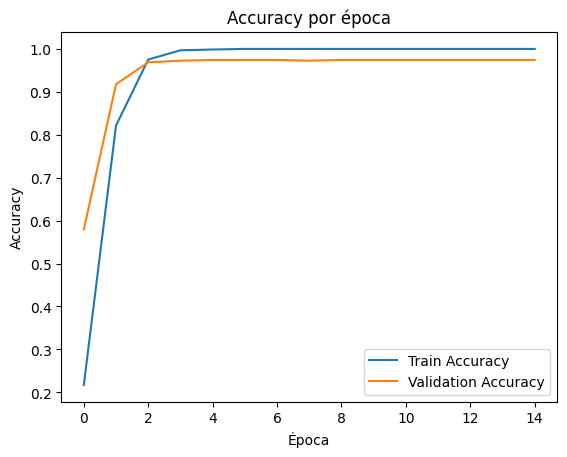

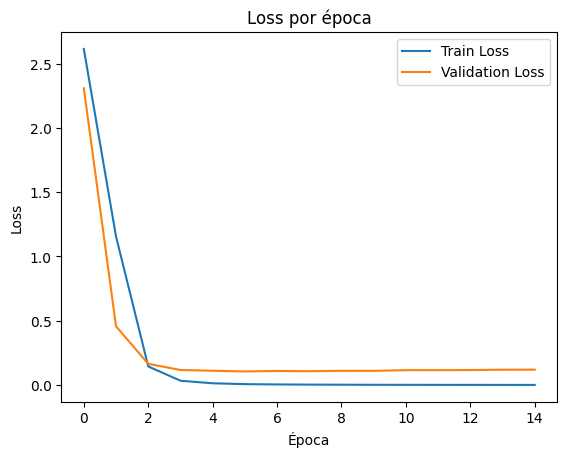

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy por época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

## DNN 3 capas 256 -> relu

In [23]:
input_dim = X_train_vec.shape[1]

model = tf.keras.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train_encoded)), activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       376,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512,015 (1.95 MB)

 Trainable params: 512,015 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(
    X_train_vec,
    y_train_encoded,
    epochs=15,
    batch_size=32,
    validation_data=(X_test_vec, y_test_encoded)
)

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3449 - loss: 2.4378 - val_accuracy: 0.7770 - val_loss: 1.4779
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9067 - loss: 0.4802 - val_accuracy: 0.9580 - val_loss: 0.2053
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0449 - val_accuracy: 0.9689 - val_loss: 0.1078
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0095 - val_accuracy: 0.9781 - val_loss: 0.0842
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.9707 - val_loss: 0.0897
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9726 - val_loss: 0.0816
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9762 - val_loss: 0.0858
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9762 - val_loss:

In [26]:
test_loss, test_acc = model.evaluate(X_test_vec, y_test_encoded)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.0887 
Test accuracy: 0.9762340188026428  test_loss:  0.08872201293706894


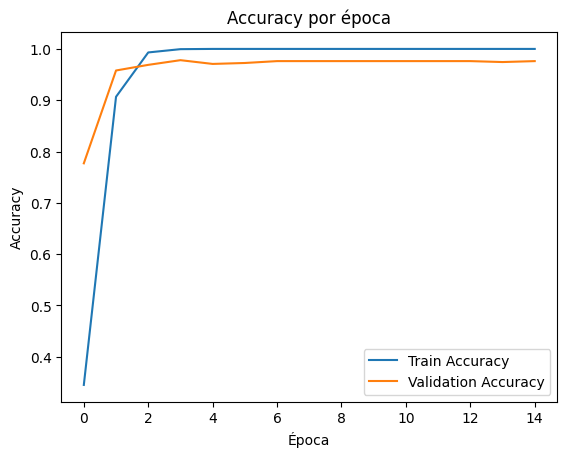

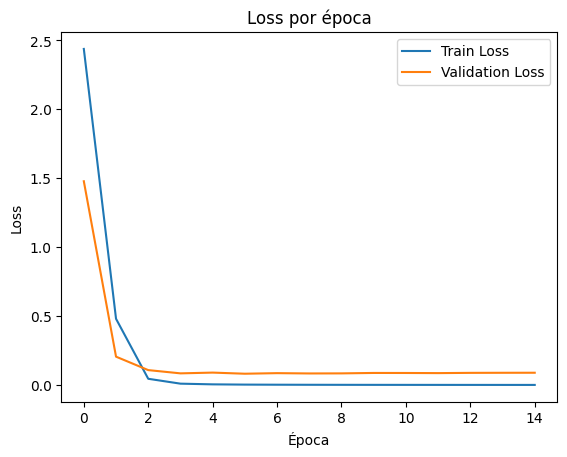

In [27]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy por época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

## DNN 3 capas:
###capa 64  -> relu
###capa 128 -> relu
###capa 256-> relu

In [28]:
input_dim = X_train_vec.shape[1]

model = tf.keras.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train_encoded)), activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │        94,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,343 (544.31 KB)

 Trainable params: 139,343 (544.31 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(
    X_train_vec,
    y_train_encoded,
    epochs=15,
    batch_size=32,
    validation_data=(X_test_vec, y_test_encoded)
)

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1935 - loss: 2.6545 - val_accuracy: 0.4570 - val_loss: 2.4414
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7420 - loss: 1.3711 - val_accuracy: 0.8830 - val_loss: 0.5509
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.1839 - val_accuracy: 0.9488 - val_loss: 0.1934
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9931 - loss: 0.0427 - val_accuracy: 0.9671 - val_loss: 0.1316
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0146 - val_accuracy: 0.9726 - val_loss: 0.1163
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0081 - val_accuracy: 0.9671 - val_loss: 0.1122
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0051 - val_accuracy: 0.9707 - val_loss: 0.1031
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9707 - val_loss:

In [31]:
test_loss, test_acc = model.evaluate(X_test_vec, y_test_encoded)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9707 - loss: 0.1107 
Test accuracy: 0.97074955701828  test_loss:  0.11065024882555008


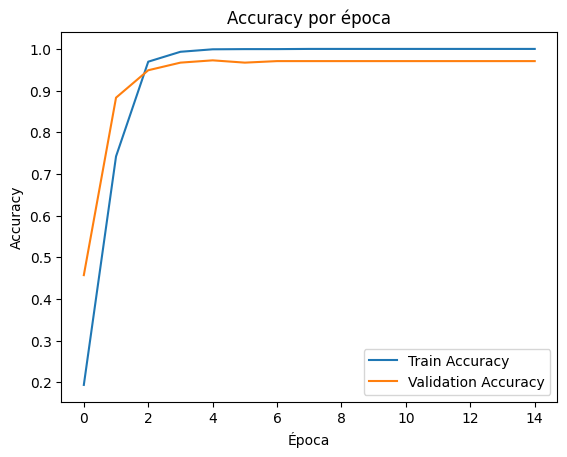

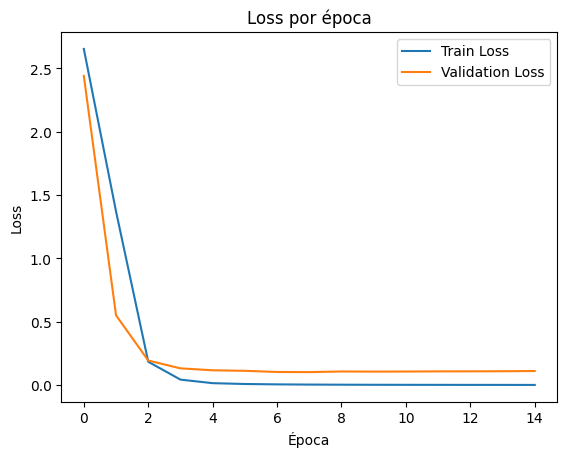

In [32]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy por época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

#  Conclusión

los tres modelos alcanzan precisión muy similar en el dataset. Sin embargo, el modelo mixto logra eficiencia óptima y precisión equivalente, por lo que se recomienda usar arquitecturas escalonadas para mejor balance entre desempeño y recursos computacionales.